## Regressão

**Wana Batista**

Introduzir e patricar conceitos de regressão. 


In [1]:
import pandas as pd

df_advertising = pd.read_csv('./dados/Advertising.csv', index_col=0)
df_advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Advertising  eh um conjunto de dados relacionando o montante de vendas (sales) com o montante investido em marketing em diferentes medias(TV, newspaper, radio).

Enquanto que o Portland_housePrices relaciona o preco de casas com seu tamanho e numero de quartos

In [2]:
dados_por = pd.read_csv('./dados/Portland_housePrices.csv', index_col= None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como Treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressao, exigira uma funcao **fit** para treinar o modelo.

Por exemplo, para a regressao linear:
    reg = LinearRegression().fit(X,y)
    
Onde X se refere aos atributos de treinamento e y à variável resposta 


In [3]:
from sklearn.linear_model import LinearRegression
X = dados_por.loc[:,['tamanho']] #feature
y = dados_por.loc[:,['preco']] #label

#aplicando regressao linear em uma feature
reg = LinearRegression().fit(X,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

# Regressao Linear  Univariada

O Framework disponibiliza uma classe LinearRegression que implememta regressao linear com medio de mininmos quadrados:

linear_model = LinearRegression()

linear_model.fit(X,y)
linear_model.predict(X)


# Avaliando Modelos

Existem algums formas de inspecionar ou avaliar o modelo aprendido. A primeira forma eh visualizar o modelo em um grafico.



Text(0, 0.5, 'preco')

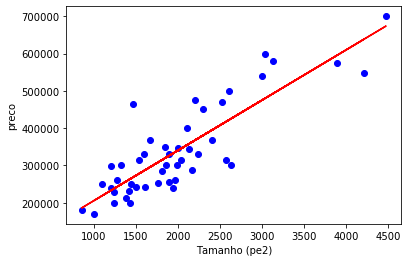

In [5]:
from matplotlib import pyplot as plt

plt.scatter(X,y,color='b')
plt.plot(X, reg.predict(X), color='r')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('preco')

Quando ha mais de um atributo preditor, visualizar o modelo torna-se dificil, mas ainda eh possivel avaliar o modelo por meio do **erro quadartico (RSS)** ou a metrica __R^2__

In [6]:
from sklearn.metrics import r2_score

def calc_rss(y, predicted):
    return float(((predicted-y)**2).sum())

def calc_r2(y, predicted):
    return r2_score(y, predicted)

In [7]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.7310037839755306


In [8]:
def plotfigs(modelo, X, y):
    
    fig = plt.Figure(figsize=(22,9))
    plt.scatter(X,y,color='b')
    plt.plot(X, modelo.predict(X), color='r')

    return fig
    

In [9]:
def xscale(X):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return  X_scaled

# Exercício 1

Treine modelos lineares na base Portland_housePrices.csv utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com tamanho ou com número de quartos?

2) O RSS e R^2 corroboram suas impressões observando o modelo?


In [10]:

X_quarto = dados_por.loc[:,['quartos']] #feature quantidade de quartos
y = dados_por.loc[:,['preco']] #label

#aplicando regressao linear em uma feature
reg_quarto = LinearRegression().fit(X_quarto,y)
reg_quarto

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

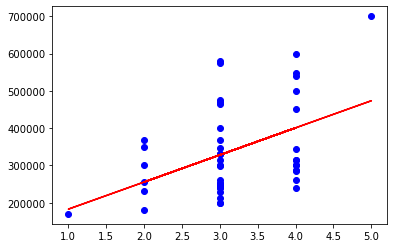

In [11]:
fig = plotfigs(reg_quarto, X_quarto, y)

In [12]:
# O RSS e R^2
rss_quarto = calc_rss(y,reg.predict(X_quarto))
r2_quarto = calc_r2(y,reg.predict(X_quarto))
print(rss_quarto)
print(r2_quarto)

4112470394446.1113
-4.718046994145579


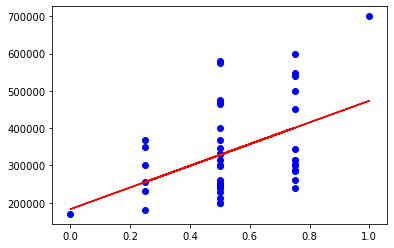

In [13]:
x_scaled = xscale(X_quarto)
#aplicando regressao linear em uma feature
reg_quarto_scaled = LinearRegression().fit(x_scaled,y)
reg_quarto_scaled

fig = plotfigs(reg_quarto_scaled, x_scaled, y)

# Exercício 2

Treine modelos lineares na base Advertising.csv utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?


In [14]:
#TV 	radio 	newspaper 	sales

X_radio = df_advertising.loc[:,['radio']] #feature quantidade de radio
X_TV = df_advertising.loc[:,['TV']] #feature quantidade de TV
X_newspaper = df_advertising.loc[:,['newspaper']] #feature quantidade de newspaper

y = df_advertising.loc[:,['sales']] #label sales



In [18]:
#aplicando regressao linear em uma feature
reg_radio = LinearRegression().fit(X_radio,y)
reg_radio

reg_TV = LinearRegression().fit(X_TV,y)
reg_TV

reg_newspaper = LinearRegression().fit(X_newspaper,y)
reg_newspaper

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

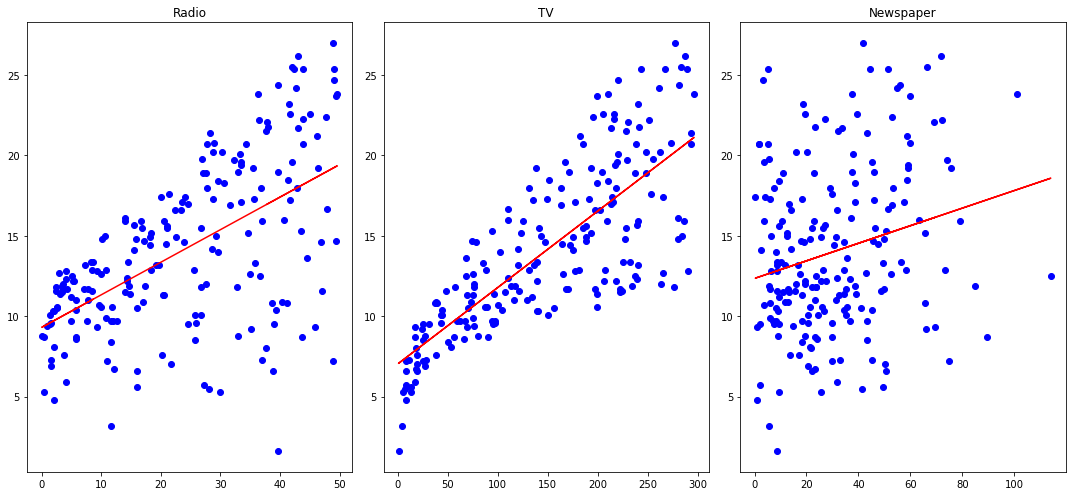

In [16]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,7))
#radio
ax1.scatter(X_radio,y,color='b')
ax1.plot(X_radio, reg_radio.predict(X_radio), color='r')
ax1.set_title('Radio')
#TV
ax2.scatter(X_TV,y,color='b')
ax2.plot(X_TV, reg_TV.predict(X_TV), color='r')
ax2.set_title('TV')
#newspaper
ax3.scatter(X_newspaper,y,color='b')
ax3.plot(X_newspaper, reg_newspaper.predict(X_newspaper), color='r')
ax3.set_title('Newspaper')
fig.tight_layout()


## Regressao Linear Multivariada

A classe LinearRegression jah estah implementada de modo a funcionar com mutlipos atributos preditores.

Tambem eh possivel utilizar o metodo descida de gradiente atraves da classe

__SGDRegressor__

In [19]:
from sklearn.linear_model import SGDRegressor

Xsg = dados_por.loc[:,['tamanho']] #feature
ysg = dados_por.loc[:,['preco']] #label
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização 
reg_grad.fit(Xsg,ysg.values.ravel())



SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0, 0.5, 'Preço')

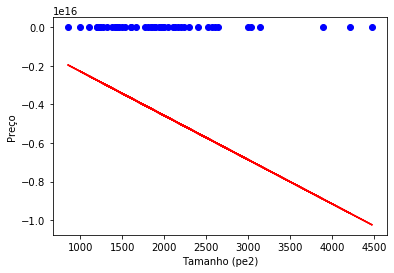

In [21]:
plt.scatter(Xsg, ysg,color='b')
plt.plot(X, reg_grad.predict(Xsg),color='r')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Entretanto... o algoritmo não aprende quando os dados são usados diretamente.

Por quê?

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente depois de normalizar os dados de entrada.
# Exercício 3

Para cada um dos conjuntos de treinamento, utilize a função fit múltiplas vezes considerando apenas um atributo preditor.

1) O modelo aprendido muda a cada vez que a função fit é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


In [26]:
#Tamanho 
reg_grad_X = SGDRegressor(max_iter=3,alpha=0,warm_start=True) 
x_tamanho_scaled = xscale(Xsg)

/home/wanabb/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Text(0, 0.5, 'Preço')

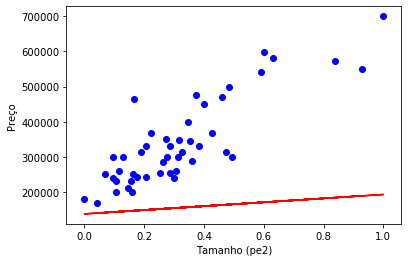

In [28]:
reg_grad_X.fit(x_tamanho_scaled,ysg.values.ravel())

plt.scatter(x_tamanho_scaled, ysg,color='b')
plt.plot(x_tamanho_scaled, reg_grad_X.predict(x_tamanho_scaled),color='r')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

/home/wanabb/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/wanabb/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/wanabb/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/wanabb/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Text(0, 0.5, 'Preço')

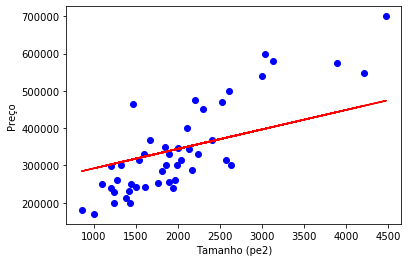

In [30]:
for i in range(10):
    reg_grad_X.fit(x_tamanho_scaled,ysg.values.ravel())

plt.scatter(Xsg, ysg,color='b')
plt.plot(Xsg, reg_grad_X.predict(x_tamanho_scaled),color='r')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

# Exercício 4

Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


In [31]:
# LINear Regression
X_tv = df_advertising.loc[:,['TV']]
X_radio = df_advertising.loc[:,['radio']]
X_newspaper = df_advertising.loc[:,['newspaper']]
X_tv_radio = df_advertising.loc[:,['TV','radio']]
X_tv_newspaper = df_advertising.loc[:,['TV','newspaper']]
X_radio_newspaper = df_advertising.loc[:,['radio','newspaper']]
X_todos = df_advertising.loc[:,['TV','radio','newspaper']]

y_adv = df_advertising.loc[:,['sales']]

lin_reg = LinearRegression().fit(X_tv,y_adv)
r2_tv = calc_r2(y_adv,lin_reg.predict(X_tv))

lin_reg = LinearRegression().fit(X_radio,y_adv)
r2_ra = calc_r2(y_adv,lin_reg.predict(X_radio))

lin_reg = LinearRegression().fit(X_newspaper,y_adv)
r2_ne = calc_r2(y_adv,lin_reg.predict(X_newspaper))

lin_reg = LinearRegression().fit(X_tv_radio,y_adv)
r2_tv_ra = calc_r2(y_adv,lin_reg.predict(X_tv_radio))

lin_reg = LinearRegression().fit(X_tv_newspaper,y_adv)
r2_tv_ne = calc_r2(y_adv,lin_reg.predict(X_tv_newspaper))

lin_reg = LinearRegression().fit(X_radio_newspaper,y_adv)
r2_ra_ne = calc_r2(y_adv,lin_reg.predict(X_radio_newspaper))

lin_reg = LinearRegression().fit(X_todos,y_adv)
r2_all = calc_r2(y_adv,lin_reg.predict(X_todos))

print("R^2 de acordo com os atributos")
print("TV:         " + str(r2_tv))
print("Radio:      " + str(r2_ra))
print("Newspaper:  " + str(r2_ne))
print("TV + Rad:   " + str(r2_tv_ra))
print("TV + News:  " + str(r2_tv_ne))
print("Rad + News: " + str(r2_ra_ne))
print("Todos:      " + str(r2_all))


R^2 de acordo com os atributos
TV:         0.611875050850071
Radio:      0.33203245544529525
Newspaper:  0.05212044544430516
TV + Rad:   0.8971942610828957
TV + News:  0.6458354938293271
Rad + News: 0.33270518395032256
Todos:      0.8972106381789522


In [32]:
import time
start_time = time.time()
X_todos_scaled = xscale(X_todos)
for i in range(5000):
    lin_reg = LinearRegression().fit(X_todos,y_adv)
print('Tempo método mínimos quadrados:', str(time.time() - start_time))

y_rgd = y_adv.values.ravel()
start_time2 = time.time()
for i in range(5000):
    lin_reg = SGDRegressor(alpha=0).fit(X_todos_scaled,y_rgd)

print('Tempo descida do gradiente: ', str(time.time() - start_time2))



Tempo método mínimos quadrados: 4.605489492416382
Tempo descida do gradiente:  17.174680709838867
